In [1]:
import pandas as pd
from collections import Counter
from data_reader import GetDataAsPython

storage_directory = './storage/'
data = GetDataAsPython(f"{storage_directory}/data_and_models/data/data_autofix_tracking_repo_specific_final.json")
data_eslint = GetDataAsPython(f"{storage_directory}/data_and_models/data/data_autofix_tracking_eslint_final.json")

In [2]:
repos = Counter([item.repo for item in data])
sorted_repos = sorted(repos.items(), key=lambda d: d[1], reverse=True)

In [3]:
sorted_repos[:10]

[('/data/all/data/oroinc/platform', 196),
 ('/data/all/data/Encapsule-Annex/onm', 191),
 ('/data/all/data/cscheid/lux', 185),
 ('/data/all/data/emberjs/ember.js', 168),
 ('/data/all/data/zloirock/core-js', 168),
 ('/data/all/data/dcos/dcos-ui', 145),
 ('/data/all/data/appium/appium', 141),
 ('/data/all/data/sequelize/sequelize', 137),
 ('/data/all/data/svgdotjs/svg.js', 134),
 ('/data/all/data/openlayers/openlayers', 126)]

In [4]:
len(sorted_repos), sum([value for key,value in sorted_repos])

(10884, 42171)

In [5]:
import matplotlib.pyplot as plt

(array([8., 6., 3., 3., 2., 3., 0., 2., 0., 3.]),
 array([ 74. ,  86.2,  98.4, 110.6, 122.8, 135. , 147.2, 159.4, 171.6,
        183.8, 196. ]),
 <BarContainer object of 10 artists>)

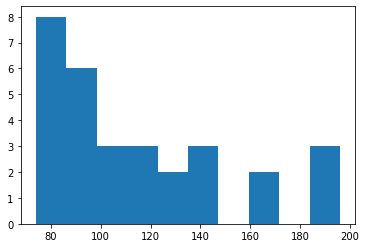

In [6]:
plt.hist([value for key,value in sorted_repos][:30])

In [7]:
sorted_repos[:26]

[('/data/all/data/oroinc/platform', 196),
 ('/data/all/data/Encapsule-Annex/onm', 191),
 ('/data/all/data/cscheid/lux', 185),
 ('/data/all/data/emberjs/ember.js', 168),
 ('/data/all/data/zloirock/core-js', 168),
 ('/data/all/data/dcos/dcos-ui', 145),
 ('/data/all/data/appium/appium', 141),
 ('/data/all/data/sequelize/sequelize', 137),
 ('/data/all/data/svgdotjs/svg.js', 134),
 ('/data/all/data/openlayers/openlayers', 126),
 ('/data/all/data/graalvm/graaljs', 118),
 ('/data/all/data/qooxdoo/qooxdoo', 117),
 ('/data/all/data/saitoha/tanasinn', 112),
 ('/data/all/data/SnakeskinTpl/Snakeskin', 109),
 ('/data/all/data/byteball/ocore', 103),
 ('/data/all/data/medikoo/es5-ext', 102),
 ('/data/all/data/jquense/react-widgets', 97),
 ('/data/all/data/mongodb/node-mongodb-native', 96),
 ('/data/all/data/eclipse/scout.rt', 90),
 ('/data/all/data/handshake-org/hsd', 89),
 ('/data/all/data/girder/girder', 88),
 ('/data/all/data/wsick/Fayde', 88),
 ('/data/all/data/winderica/KanColleSource', 86),
 ('

In [8]:
target_big = sorted_repos[:26:3]
target_big, len(target_big), sum([value for key,value in target_big])

([('/data/all/data/oroinc/platform', 196),
  ('/data/all/data/emberjs/ember.js', 168),
  ('/data/all/data/appium/appium', 141),
  ('/data/all/data/openlayers/openlayers', 126),
  ('/data/all/data/saitoha/tanasinn', 112),
  ('/data/all/data/medikoo/es5-ext', 102),
  ('/data/all/data/eclipse/scout.rt', 90),
  ('/data/all/data/wsick/Fayde', 88),
  ('/data/all/data/kuzzleio/kuzzle', 80)],
 9,
 1103)

In [9]:
source_big = [item for item in sorted_repos[:26] if item not in target_big]
source_big[:3], len(source_big), sum([value for key,value in source_big])

([('/data/all/data/Encapsule-Annex/onm', 191),
  ('/data/all/data/cscheid/lux', 185),
  ('/data/all/data/zloirock/core-js', 168)],
 17,
 2027)

In [10]:
target_small = sorted_repos[26::7]
target_small[:2], len(target_small), sum([value for key,value in target_small])

([('/data/all/data/rancher/ui', 77), ('/data/all/data/milojs/milo', 71)],
 1552,
 5607)

In [11]:
source_small = [item for item in sorted_repos[26:] if item not in target_small]
source_small[:3], len(source_small), sum([value for key,value in source_small])

([('/data/all/data/openstf/stf', 76),
  ('/data/all/data/Vincit/objection.js', 75),
  ('/data/all/data/wikimedia/mediawiki-extensions-VisualEditor', 74)],
 9306,
 33434)

In [12]:
source_small_df = pd.DataFrame(source_small, columns=['repo', 'samples'])
source_small_df['category'] = 'source'
source_small_df['size'] = 'small'
source_big_df = pd.DataFrame(source_big, columns=['repo', 'samples'])
source_big_df['category'] = 'source'
source_big_df['size'] = 'big'
target_small_df = pd.DataFrame(target_small, columns=['repo', 'samples'])
target_small_df['category'] = 'target'
target_small_df['size'] = 'small'
target_big_df = pd.DataFrame(target_big, columns=['repo', 'samples'])
target_big_df['category'] = 'target'
target_big_df['size'] = 'big'

repos_df = pd.concat([source_small_df, source_big_df, target_small_df, target_big_df], ignore_index=True)
repos_df.head(1)

,repo,samples,category,size
0,/data/all/data/openstf/stf,76,source,small


In [13]:
repos_df.to_csv('./repos_3.csv')